<h1>Исследование объявлений о продаже квартир<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-файла-с-данными" data-toc-modified-id="Изучение-общей-информации-файла-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации файла с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Добавляем-в-таблицу-новые-столбцы" data-toc-modified-id="Добавляем-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавляем в таблицу новые столбцы</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-основные-параметры" data-toc-modified-id="Изучим-основные-параметры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим основные параметры</a></span></li><li><span><a href="#Изучим-время-продажи" data-toc-modified-id="Изучим-время-продажи-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим время продажи</a></span></li><li><span><a href="#Определим-факторы,-которые-больше-всего-влияют-на-стоимость-объекта." data-toc-modified-id="Определим-факторы,-которые-больше-всего-влияют-на-стоимость-объекта.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определим факторы, которые больше всего влияют на стоимость объекта.</a></span></li><li><span><a href="#Средняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений" data-toc-modified-id="Средняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a></span></li><li><span><a href="#Cредняя-стоимость-на-разном-удалении-от-центра-города" data-toc-modified-id="Cредняя-стоимость-на-разном-удалении-от-центра-города-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Cредняя стоимость на разном удалении от центра города</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Цель исследования: 
Определить параметры влияющие на рыночную стоимость. Это необходимо для дальнейшего построения системы, которая будет отслеживать аномалии и мошенническую деятельность.

### Изучение общей информации файла с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
ap = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
shape = ap.shape
ap.info()
ap.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

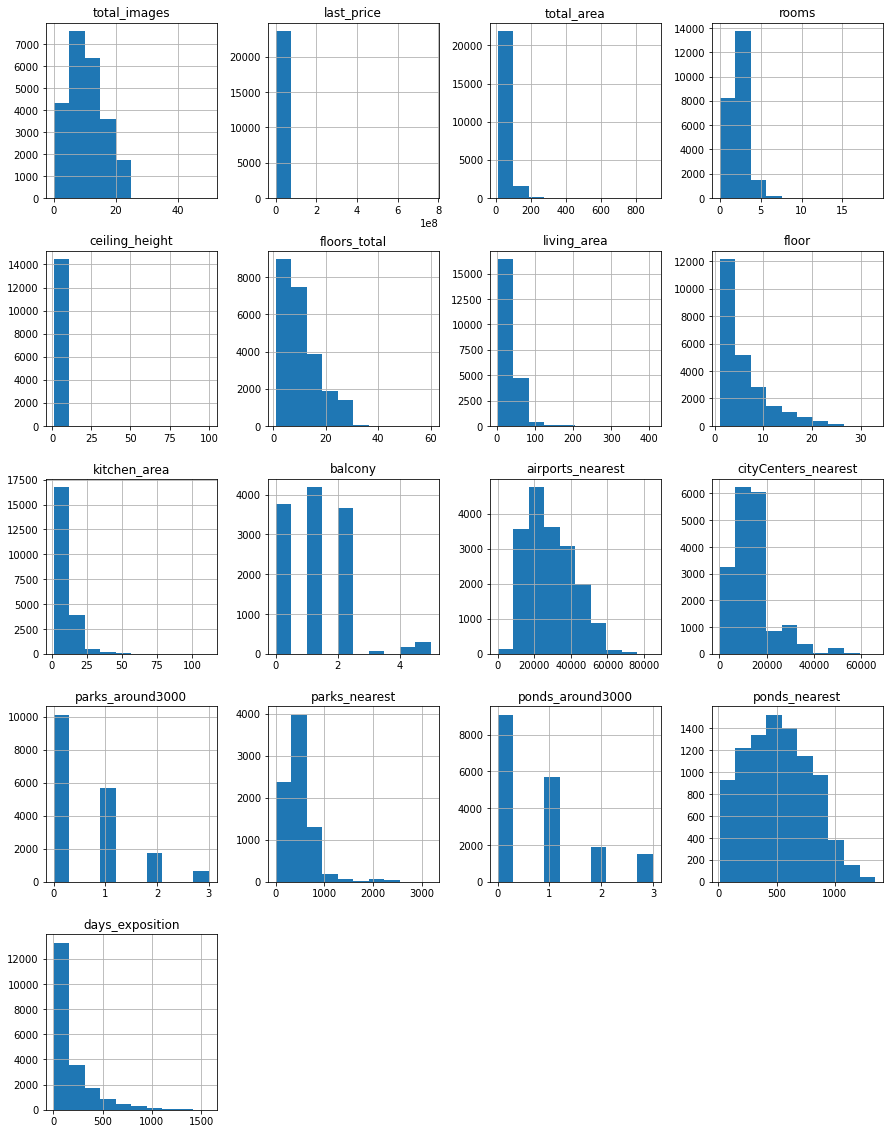

In [2]:
ap.hist(figsize=(15, 20))

Данные содержат множество пропусков. Требуется тщательная предобработка данных.

### Предобработка данных

In [3]:
print(ap.duplicated().sum()) # Поиск дубликатов
ap.isna().sum() # Поиск пропусков

0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполним пропуски, где это возможно. 

Пропуски в столбце о наличии балконов заменим "0", предположив, что балкон отсутсвует. 
Пропуски в столбце с высотой потолков заменим, заменим на медианное значение.  
Пропуски в локации удалим, как и пропуски в столбце с количеством этажей, так как их немного.
Это не исказит результатов исследования, но позволит изменить тип данных на целочисленный.

In [4]:
ap['balcony'] = ap['balcony'].fillna(0)
ap['ceiling_height'] = ap['ceiling_height'].fillna(ap['ceiling_height'].median())
ap = ap.dropna(subset=['locality_name'])
ap = ap.dropna(subset=['floors_total'])

In [5]:
ap['is_apartment'].value_counts()
ap = ap.drop(columns = ['is_apartment'], axis = 1)

Столбец содержащий информацию о, том является ли квартира аппартаментами содержит подавляющее количество пропусков. Аппартаментами указаны всего лишь в 50 объявлениях. В связи с малой информативностью данного столбца, его влияние на исследование минимально. По его данным нельзя выявить влияние на цену, поэтому удалим этот столбец.

In [6]:
# код ревьюера
import datetime as dt

ap['first_day_exposition'] = pd.to_datetime(ap['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
ap['first_day_year'] = ap['first_day_exposition'].dt.year
ap[ap['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,957,1788


In [7]:
ap.isna().sum() # Проверим как мы справились с пропусками

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
first_day_year              0
dtype: int64

Данные все еще содержат множество пропусков. Часть из них должны были заполнится автоматически с помощью геосервисов. Информацию о сбое передадим коллегам для улучшения последующего сбора данных. Но на данный момент исправить пропуски не представляется возможным. Продолжим предобратку данных.

Количество балконов - целое число. Округлим до целого числа столбцы, где это логично и возможно. Изменим тип значений в этих столбцах для удобства рассчетов и ясности исследования. К сожалению пропуски не позволяют сделать тоже самое с другими столбцами.

In [8]:
ap['balcony'] = ap['balcony'].astype(int)
ap['last_price'] = ap['last_price'].astype(int)
ap['floors_total'] = ap['floors_total'].astype(int)
ap['first_day_exposition'] = pd.to_datetime(ap['first_day_exposition'], format='%Y-%m-%d')

In [9]:
ap['locality_name'].value_counts()

Санкт-Петербург                                            15651
посёлок Мурино                                               520
посёлок Шушары                                               439
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 176
Кудрово                                                      171
деревня Новое Девяткино                                      143
Сертолово                

В названиях локаций наблюдаются неявные дубликаты в названиях поселков. Исправим это.

In [10]:
ap['locality_name'] = (ap['locality_name'].replace(['поселок городского типа', 'городской посёлок', 'городской поселок', 'посёлок', 'поселок при железнодорожной станции', 'коттеджный поселок', 'поселок станции'], 'поселок', regex=True)) 

**В ходе предообработки данных мы заменили или удалили данные с пропусками, заменили типы данных, удалили строки с аномальными значениями и исправили неявные дубликаты названий.**

### Добавляем в таблицу новые столбцы

Цена одного квадратного метра:

In [11]:
ap['m²/rub'] = ap['last_price']/ap['total_area']
ap['m²/rub'] = ap['m²/rub'].astype(int)

День недели публикации объявления:

In [12]:
ap['weekday'] = ap['first_day_exposition'].dt.weekday

Mесяц публикации объявления:

In [13]:
ap['month'] = ap['first_day_exposition'].dt.month

Год публикации объявления:

In [14]:
ap['year'] = ap['first_day_exposition'].dt.year

Тип этажа квартиры:

In [15]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
ap['floor_category'] = ap.apply(categorize_floor, axis=1)

Расстояние до центра города в километрах:

In [16]:
ap['cityCenters_km'] = ap['cityCenters_nearest'] / 1000
ap['cityCenters_km'] = round(ap['cityCenters_km'])

Цена в млн. рублей

In [17]:
ap['last_price_million'] = ap['last_price'] / 1000000 

In [18]:
ap.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,m²/rub,weekday,month,year,floor_category,cityCenters_km,last_price_million
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019,120370,3,3,2019,другой,16.0,13.000
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,82920,1,12,2018,первый,19.0,3.350
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,92785,3,8,2015,другой,14.0,5.196
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015,408176,4,7,2015,другой,7.0,64.900
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,100000,1,6,2018,другой,8.0,10.000


**В таблицу добавлены новые столбцы, которые помогут в дальнейшем исследовании.**

### Исследовательский анализ данных

#### Изучим основные параметры

19904    12.0
17961    13.0
19546    13.0
19807    13.0
19558    13.2
Name: total_area, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,m²/rub,weekday,month,year,floor_category,cityCenters_km,last_price_million
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,2019,110169,3,2,2019,другой,5.0,65.0
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,2017,485436,0,12,2017,другой,5.0,300.0
3117,19,140000000,631.0,2019-03-30,7,2.65,5,NaN,5,False,False,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,2019,221870,5,3,2019,последний,5.0,140.0
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,2019,221799,1,4,2019,последний,5.0,140.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,2017,466666,2,12,2017,последний,8.0,420.0


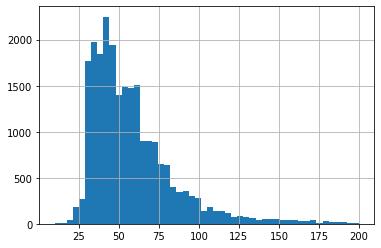

In [19]:
print(ap['total_area'].sort_values().head())
ap['total_area'].hist(range=(10,200), bins=50)
ap.sort_values('total_area').tail()

Действительно в данных по площади есть выбивающиеся значения, как и очень маленьких квартир 12 м², так и огромных 900 м². Тем не менее принято решение их оставить, так как такие предложения на рынке недвижиммости действительно существуют. А значит, их удаление может вызвать искажение. Но график мы ограничим 200 м² для наглядности.

Для наглядности разделим квартиры на группы по площади. И построим новый график.

<AxesSubplot:>

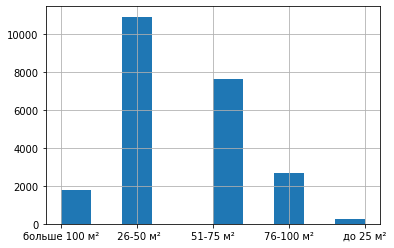

In [20]:
def categorize_area(area):
        if 0 <= area <= 25:
            return 'до 25 м²'
        elif 26 <= area <= 50:
            return ' 26-50 м²'
        elif 51 <= area <= 75: 
            return '51-75 м²'
        elif 76 <= area <= 100:
            return '76-100 м²'
        elif 101 <= area:
            return 'больше 100 м²'
ap_a = ap['total_area'].apply(categorize_area) 
ap_a.hist()

На графике мы видим пять групп объявлений. Большинство продоваемых квартир в Санкт-Петербурге имеют площадь от 27 до 50 м². Также много объявлений о продаже вкартир площадью от 50 до 75 м². 

In [21]:
ap_la = ap.query('0 < living_area < 900')  #Временно отбрасываем пропуски, чтобы посмотреть максимальные значения
print(ap_la['living_area'].sort_values().tail())
ap.sort_values('living_area').head(30)

12859    322.3
4237     332.0
12401    347.5
5358     409.0
19540    409.7
Name: living_area, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,m²/rub,weekday,month,year,floor_category,cityCenters_km,last_price_million
21758,0,2330000,23.00,2018-01-01,0,2.65,24,2.0,22,True,False,NaN,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,2018,101304,0,1,2018,другой,NaN,2.330000
13915,20,6350000,52.00,2018-02-06,2,3.00,6,2.0,2,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,2018,122115,1,2,2018,другой,7.0,6.350000
23574,14,64990000,139.00,2015-11-24,3,3.00,8,3.0,8,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,2015,467553,1,11,2015,последний,6.0,64.990000
3242,7,4440000,41.00,2017-07-02,1,2.65,17,3.0,17,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,2017,108292,6,7,2017,последний,13.0,4.440000
17582,11,2680000,22.00,2018-08-11,0,2.65,25,5.0,8,True,False,NaN,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,2018,121818,5,8,2018,другой,12.0,2.680000
21943,15,6100000,77.60,2019-02-28,4,2.50,9,5.4,1,False,False,9.8,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,2019,78608,3,2,2019,первый,11.0,6.100000
16431,13,3799000,31.00,2018-04-12,1,2.60,5,6.0,1,False,False,17.0,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,2018,122548,3,4,2018,первый,5.0,3.799000
19251,19,4050000,33.00,2018-10-15,1,2.50,22,6.5,21,False,False,18.0,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,2018,122727,0,10,2018,другой,11.0,4.050000
23208,12,4800000,37.00,2016-02-24,1,2.65,14,8.0,11,False,False,22.0,0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0,2016,129729,2,2,2016,другой,12.0,4.800000
20994,7,8900000,50.60,2018-10-22,2,2.50,7,8.0,3,False,False,31.0,0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,NaN,2018,175889,0,10,2018,другой,8.0,8.900000


При изучение выдающихся значений, замечены аномально маленькие жилые площади квартир по отношению к их общей площади. Удалим строки с жилой площадью до 10 м².

<AxesSubplot:>

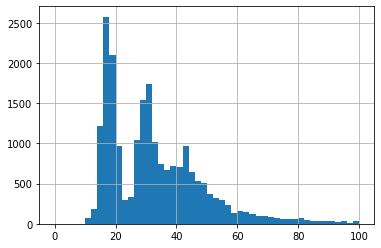

In [22]:
ap = ap.query('10 < living_area < 900 or living_area.isna()')
ap['living_area'].hist(bins=50, range=(0,100)) # Оставим вне графика длинный хвост элитных квартир с большими жилыми площадями

На графике мы видим три "пика", и это распределение выглядит странно, особенно в связи с глубокой "впадиной" между двумя "пиками". Это может быть связанно со многими факторами, например, с особенностями типовой застройки или ошибками в заполнении объявлений.

16239     93.2
5358     100.0
2489     100.7
20215    107.0
19540    112.0
Name: kitchen_area, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,m²/rub,weekday,month,year,floor_category,cityCenters_km,last_price_million
20217,7,4250000,28.50,2019-05-01,1,2.80,14,19.5,10,False,False,1.3,0,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN,2019,149122,2,5,2019,другой,13.0,4.25
19642,5,1190000,14.00,2018-07-29,1,2.65,5,11.0,1,False,False,2.0,0,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0,2018,85000,6,7,2018,первый,11.0,1.19
9138,17,2920000,23.29,2018-12-12,1,2.65,3,21.0,1,False,False,2.0,0,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0,2018,125375,2,12,2018,первый,4.0,2.92
21419,4,1870000,20.00,2018-03-06,1,2.50,5,14.0,1,False,False,2.0,0,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0,2018,93500,1,3,2018,первый,16.0,1.87
11033,6,5350000,32.00,2016-04-20,1,2.65,14,16.0,10,False,False,2.0,0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0,2016,167187,2,4,2016,другой,4.0,5.35


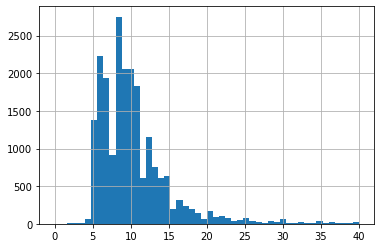

In [23]:
ap_k = ap.dropna(subset = ['kitchen_area'])  #Временно отбрасываем пропуски, чтобы посмотреть максимальные значения
print(ap_k['kitchen_area'].sort_values().tail())
ap['kitchen_area'].hist(bins=50, range=(0,40)) #Снова оставим за пределами графика огромные значения
ap.sort_values('kitchen_area').head(5)

Выбивающиися и редкие значения есть, но они соответсвуют общей площади квартир. Снова мы видим три "пика", что снова наводит на мысль об особенностях типовой застройки. Например, во многих домах до 80 года постройки дейтсвительно преобладают маленькие кухни до 6 м², независимо от площади квартир. 

In [24]:
print(ap['last_price'].sort_values().tail())
ap.sort_values('last_price').head()

15651    300000000
1436     330000000
14706    401300000
19540    420000000
12971    763000000
Name: last_price, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,m²/rub,weekday,month,year,floor_category,cityCenters_km,last_price_million
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,2019,111,2,3,2019,последний,9.0,0.01219
14911,5,430000,54.0,2018-06-26,2,2.65,3,NaN,3,False,False,NaN,0,поселок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,2018,7962,1,6,2018,последний,NaN,0.43000
17456,7,430000,30.4,2019-04-22,1,2.65,2,16.0,1,False,False,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,14144,0,4,2019,первый,NaN,0.43000
16274,18,440000,40.0,2018-07-10,1,2.65,5,NaN,1,False,False,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2018,11000,1,7,2018,первый,NaN,0.44000
17676,0,450000,36.5,2018-02-01,1,2.65,5,17.3,4,False,False,8.5,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0,2018,12328,3,2,2018,другой,NaN,0.45000


Как мы видим есть одна строка с аномально низким значением цены, так как этот показатель является характерным для нас, удалим эту строку. И еще несколько с черезчур дорогими квартирами.

1026     155.0000
16495    159.0000
2536     159.9840
19155    160.0000
19865    180.0000
8900     190.8700
5893     230.0000
13749    240.0000
16461    245.0000
22831    289.2384
Name: last_price_million, dtype: float64


<AxesSubplot:>

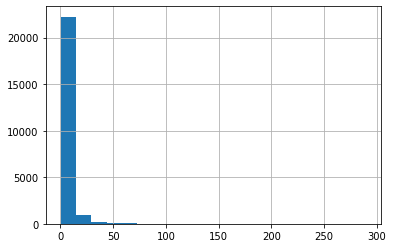

In [25]:
ap = ap.query(' 12190 < last_price < 300000000')
print(ap['last_price_million'].sort_values().tail(10))
ap['last_price_million'].hist(bins=20)

<AxesSubplot:>

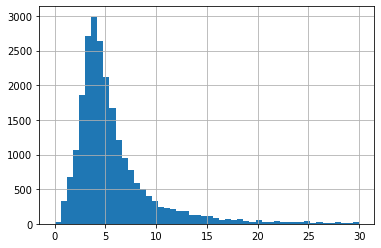

In [26]:
ap['last_price_million'].hist(range=(0,30), bins=50)

Мы видим, что подавляющее большинство объявлений имеет цену ниже 50 млн. В то же время из-за большого разброса цен элитного жилья, мы средняя ценовая категория сливается в один столбец. После детализации графика большинство объявлений оказалось ниже 5 млн. Разброс цен огромный, но реалистичный, так как продавец в праве поставить любую цену.

15273    0
18028    0
21227    0
6612     0
22391    0
Name: rooms, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,m²/rub,weekday,month,year,floor_category,cityCenters_km,last_price_million
18891,11,40000000,290.0,2016-06-21,10,3.50,6,189.4,6,False,False,30.0,1,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0,2016,137931,1,6,2016,последний,5.0,40.000
4149,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN,2018,84372,3,1,2018,последний,12.0,23.000
18119,4,15500000,216.1,2016-07-04,10,3.15,5,161.4,2,False,False,19.8,0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0,2016,71726,0,7,2016,другой,5.0,15.500
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,2017,170015,1,2,2017,другой,1.0,33.000
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,2018,95264,6,7,2018,последний,3.0,17.500
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,2017,68870,5,12,2017,другой,8.0,25.000
20829,6,28659000,245.4,2016-03-31,14,2.65,4,168.3,2,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,2016,116784,3,3,2016,другой,2.0,28.659
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,2019,110169,3,2,2019,другой,5.0,65.000
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,2015,105555,0,3,2015,последний,4.0,28.500
14498,6,32250000,374.6,2018-06-09,19,2.65,5,264.5,2,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,2018,86091,5,6,2018,другой,4.0,32.250


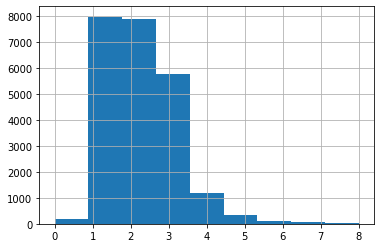

In [27]:
print(ap['rooms'].sort_values().head())
ap['rooms'].hist(range=(0,8), bins=9) # Оставим богатых с их причудами, как всегда, за скобками графика
ap.sort_values('rooms').tail(10)

Разброс уже привычно большой, но все еще объяснимый. 0 комнат могут указаны быть в квартирах-студиях. И 19 комнат на жилой площади 264 м² вполне могут поместиться. Если разделить поровну это 13 м² на комнату, что больше некоторых представленных в данных квартир. Что же касается большинства, это, как можно было предположить 1 и 2-х комнатные квартиры. Чуть меньше 3-х комнатных.

In [28]:
print(ap['ceiling_height'].sort_values().head(20))
ap.sort_values('ceiling_height').tail(60)

22590    1.00
5712     1.20
16934    1.75
20520    2.00
22960    2.00
552      2.00
16884    2.00
4212     2.00
11352    2.00
2572     2.00
19098    2.00
16446    2.00
5850     2.00
19329    2.00
12755    2.20
17794    2.25
5498     2.30
1582     2.30
17762    2.30
23498    2.30
Name: ceiling_height, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,m²/rub,weekday,month,year,floor_category,cityCenters_km,last_price_million
20873,18,11500000,113.5,2018-09-17,3,4.20,7,44.2,6,False,False,21.7,1,Санкт-Петербург,21739.0,291.0,2.0,472.0,2.0,94.0,NaN,2018,101321,0,9,2018,другой,0.0,11.500
19041,8,23750000,124.0,2016-11-25,3,4.20,6,67.0,2,False,False,26.0,0,Санкт-Петербург,23568.0,1898.0,3.0,515.0,3.0,264.0,775.0,2016,191532,4,11,2016,другой,2.0,23.750
22055,2,8550000,75.1,2017-08-09,3,4.20,6,52.5,3,False,False,8.0,0,Санкт-Петербург,23060.0,2602.0,1.0,584.0,0.0,NaN,477.0,2017,113848,2,8,2017,другой,3.0,8.550
17078,20,11500000,57.4,2017-07-24,1,4.25,6,37.5,3,False,False,5.6,0,Санкт-Петербург,21990.0,392.0,3.0,207.0,2.0,617.0,451.0,2017,200348,0,7,2017,другой,0.0,11.500
10754,8,9350000,74.0,2018-09-04,3,4.30,4,46.0,2,False,False,10.0,0,Санкт-Петербург,20468.0,2417.0,2.0,538.0,2.0,708.0,NaN,2018,126351,1,9,2018,другой,2.0,9.350
4201,9,8250000,84.2,2017-11-29,2,4.37,3,52.0,3,False,False,15.0,0,Санкт-Петербург,23959.0,4527.0,1.0,342.0,0.0,NaN,17.0,2017,97980,2,11,2017,последний,5.0,8.250
11651,1,8500000,135.0,2016-07-03,3,4.40,5,61.5,3,False,False,16.0,0,Санкт-Петербург,24844.0,4840.0,0.0,NaN,1.0,787.0,257.0,2016,62962,6,7,2016,другой,5.0,8.500
6728,10,55000000,280.0,2018-03-22,7,4.40,6,195.0,5,False,False,22.0,1,Санкт-Петербург,32534.0,4725.0,0.0,NaN,2.0,594.0,406.0,2018,196428,3,3,2018,другой,5.0,55.000
7274,16,43000000,280.0,2014-12-10,5,4.40,5,NaN,4,False,False,NaN,0,Санкт-Петербург,26711.0,5559.0,0.0,NaN,1.0,785.0,1065.0,2014,153571,2,12,2014,другой,6.0,43.000
8018,20,84000000,507.0,2015-12-17,5,4.45,7,301.5,7,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,2015,165680,3,12,2015,последний,6.0,84.000


Данные с потолками вызывают некоторые подозрения. Удалим строки с аномальными значениями. 

<AxesSubplot:>

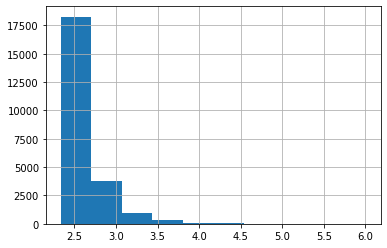

In [29]:
mask = (ap['ceiling_height'] >= 24) & (ap['ceiling_height'] <= 32)
ap.loc[mask, 'ceiling_height'] = ap.loc[mask, 'ceiling_height'] / 10

ap = ap.query('2.3 < ceiling_height <= 6')
ap['ceiling_height'].hist()

Логично, что больше всего квартир имеют высоту потолков от 2.5 до 3 метров.

<AxesSubplot:>

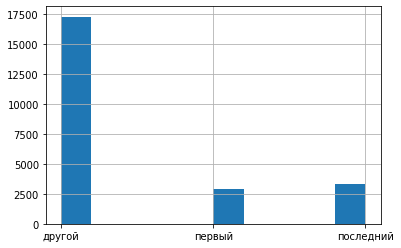

In [30]:
ap['floor_category'].hist()

График выглядит вполне убедительно.

<AxesSubplot:>

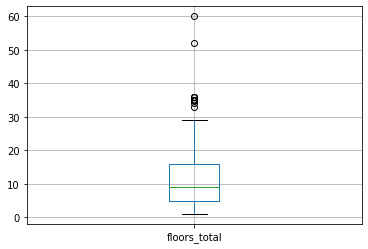

In [31]:
ap.boxplot('floors_total')

<AxesSubplot:>

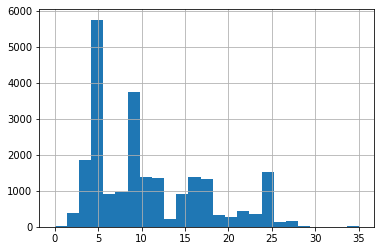

In [32]:
ap['floors_total'].hist(bins=25, range=(0,35))

Этажность зданий не вызывает сомнений, три "пика" обусловлены типовой застройкой. 

In [33]:
print(ap['cityCenters_nearest'].sort_values().head())
ap_c = ap.dropna(subset = ['cityCenters_nearest'])
ap_c.sort_values('cityCenters_nearest').tail()

13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
Name: cityCenters_nearest, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,m²/rub,weekday,month,year,floor_category,cityCenters_km,last_price_million
5218,15,3650000,53.8,2018-09-24,3,2.50,4,36.9,3,False,False,5.2,0,поселок Молодёжное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0,2018,67843,0,9,2018,другой,65.0,3.65
20746,1,3300000,43.5,2016-02-16,2,2.55,4,27.2,2,False,False,5.0,1,поселок Молодёжное,84006.0,65105.0,0.0,NaN,0.0,NaN,1043.0,2016,75862,1,2,2016,другой,65.0,3.30
577,7,4000000,59.0,2017-07-23,3,2.50,5,37.0,1,False,False,7.0,0,поселок Молодёжное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN,2017,67796,6,7,2017,первый,66.0,4.00
5340,19,3600000,50.6,2019-03-19,2,2.50,5,29.9,4,False,False,7.0,1,поселок Молодёжное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN,2019,71146,1,3,2019,другой,66.0,3.60
9640,8,4200000,51.4,2014-12-10,2,2.55,5,31.0,2,False,False,6.0,1,поселок Молодёжное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0,2014,81712,2,12,2014,другой,66.0,4.20


<AxesSubplot:>

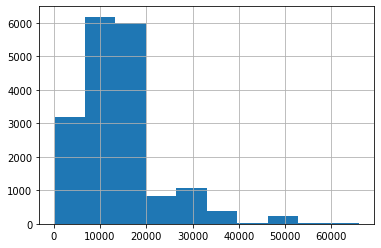

In [34]:
ap['cityCenters_nearest'].hist()

Аномальных значений нет. Большинство объявлений находится в черте города, и на периферии.

14624    1.0
11949    3.0
22941    4.0
9344     7.0
20193    9.0
Name: parks_nearest, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,m²/rub,weekday,month,year,floor_category,cityCenters_km,last_price_million
23080,15,4650000,44.5,2018-02-20,2,2.65,5,25.2,2,False,False,5.5,1,Санкт-Петербург,14965.0,9877.0,1.0,2984.0,1.0,284.0,152.0,2018,104494,1,2,2018,другой,10.0,4.65
19208,17,14950000,187.0,2017-10-12,5,3.00,2,80.0,2,False,False,17.0,1,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0,2017,79946,3,10,2017,последний,9.0,14.95
1590,3,7500000,70.0,2017-07-11,2,2.65,18,37.0,13,False,False,10.0,0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0,2017,107142,1,7,2017,другой,10.0,7.50
10959,9,3000000,31.1,2017-03-21,1,2.65,5,17.7,2,False,False,5.5,0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0,2017,96463,1,3,2017,другой,10.0,3.00
19430,9,3900000,30.5,2018-02-22,1,2.60,5,16.5,1,False,False,5.5,0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0,2018,127868,3,2,2018,первый,10.0,3.90


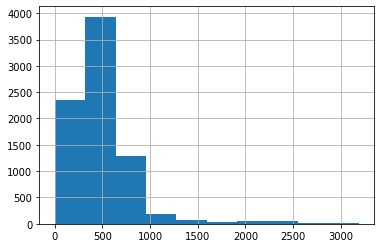

In [35]:
print(ap['parks_nearest'].sort_values().head())
ap_park = ap.dropna(subset = ['parks_nearest'])
ap['parks_nearest'].hist()
ap_park.sort_values('parks_nearest').tail()

Большинство квартир находится недалеко от парков в полукилометре. Чуть меньше квартир находятся еще ближе.  В дальнейшем посмотрим, влияет ли это на цену.

In [36]:
print(ap.shape)
23474 / 23699 * 100

(23474, 29)


99.05059285201907

**Мы более внимательно изучили данные, визуализировав их и удалив аномальные значения, которые составляли менее 1% данных.**

#### Изучим время продажи 

<AxesSubplot:>

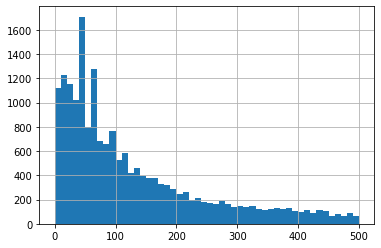

In [37]:
ap['days_exposition'].hist(range=(0,500), bins=50)

<AxesSubplot:>

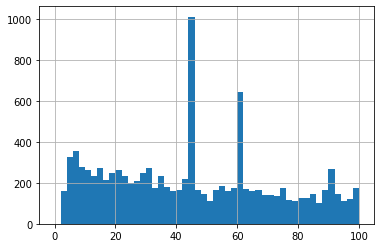

In [38]:
ap['days_exposition'].hist(range=(0,100), bins=50) # Посмотрим более детально срок в 100 дней

In [39]:
ap['days_exposition'].describe()

count    20313.000000
mean       180.825826
std        219.931676
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

** Не смотря на то, что снятие с публикации не означает, что объект продан. Сама публикация имеет целью именно продажу, поэтому средний срок публикации можно считать средним сроком продажи.**

**По данным мы можем сделать вывод, что в среднем квартиры продаются за 3 месяца. Есть объекты, публикации которых висят годами, но по графикам видно, что это редкие исключения. Быстрыми продажами можно назвать в срок до 43 дней, а черезчур долгими - больше 237 или 8 месяцев.**

**Так же на графике мы видим два пика примерно 45  и 60 дней. Они могут означать автоматические снятия публикаций.**

#### Определим факторы, которые больше всего влияют на стоимость объекта.

**Влияние общей площади на цену**

0.7198361501841265


<AxesSubplot:xlabel='last_price_million', ylabel='total_area'>

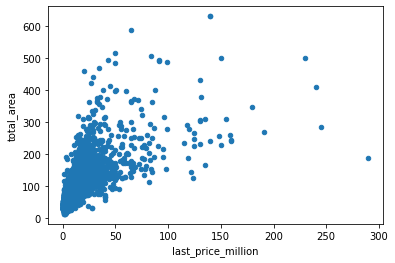

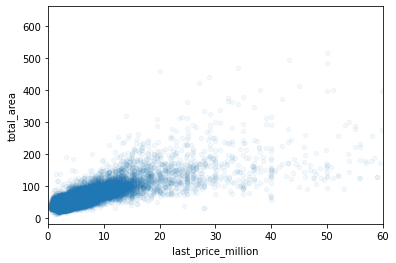

In [40]:
print(ap['last_price_million'].corr(ap['total_area'])) # Корреляция цены и общей площади
ap.plot(x='last_price_million', y='total_area', kind='scatter') # Общий график
ap.plot(x='last_price_million', y='total_area', kind='scatter', xlim=(0,60), alpha=0.05) # Более детальный график

0.2890378960538492

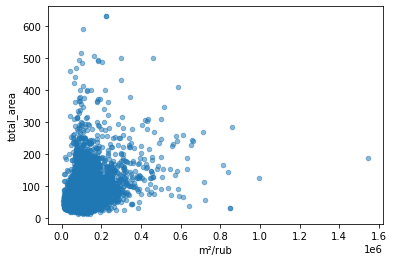

In [41]:
ap.plot(x='m²/rub', y='total_area', kind='scatter', alpha=0.5) # Зависимость площади и цены за м²
ap['m²/rub'].corr(ap['total_area']) # Корреляция цены за  и площади м²

По графику и по коффициенту корреляции мы видим тесную взаимосвязь цены и площади квартиры. С увелечением одного показателя, увеличивается и другой. В тоже время мы видим, что цена за м² слабо связана с площадью квартиры.

**Влияние жилой площади на цену**

0.6371638569693168


0.2107737387033348

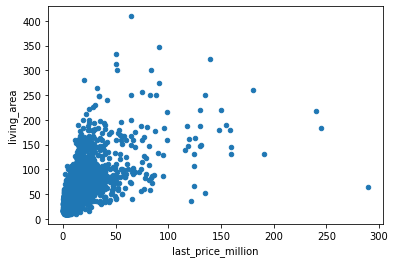

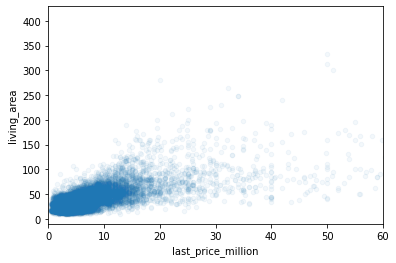

In [42]:
ap.plot(x='last_price_million', y='living_area', kind='scatter')  # Общий график
ap.plot(x='last_price_million', y='living_area', kind='scatter', xlim=(0,60), alpha=0.05) # Более детальный график
print(ap['last_price_million'].corr(ap['living_area'])) # Корреляция цены и жилой площади
ap['m²/rub'].corr(ap['living_area']) # Корреляция цены за м² и жилой площади

Взаимосвязь цены к жилой площади также присутствует, но она слабее, чем к общей площади. На графике это видно по стремлению точек к горизотальной линии, а не диагональной. Wена за м² слабо связана с  жилой площадью квартиры.

**Влияние площади кухни на цену**

0.5408789393365449
0.400149122002201


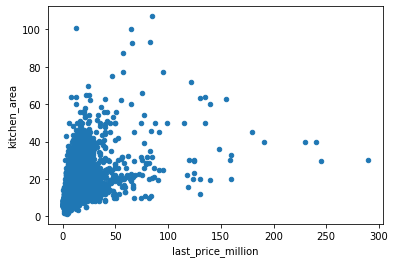

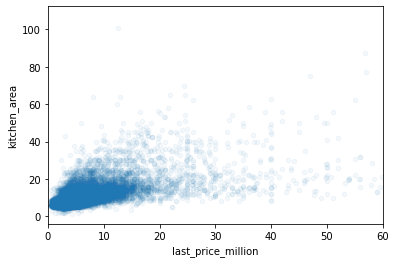

In [43]:
ap.plot(x='last_price_million', y='kitchen_area', kind='scatter')  # Общий график
ap.plot(x='last_price_million', y='kitchen_area', kind='scatter', xlim=(0,60), alpha=0.05) # Более детальный график
print(ap['last_price_million'].corr(ap['kitchen_area'])) # Корреляция цены и площади кухни
print(ap['m²/rub'].corr(ap['kitchen_area'])) # Корреляция цены за м² и площади кухни

Еще слабее связь площади кухни к цене. Зато площадь кухни влияет сильнее других показателей площади на цену за м². 

**Влияние количества комнат на цену**

In [44]:
ap_rooms = ap.query('rooms <= 7') # Рассмотри зависимость цены и количества комнат без выбивающихся значений
price_vs_rooms = ap_rooms.pivot_table(index='rooms', values='last_price_million', aggfunc=['mean','median', 'count'])
price_vs_rooms

,mean,median,count
,last_price_million,last_price_million,last_price_million
rooms,,,
0,3.357967,2.730,191
1,3.833455,3.600,7948
2,5.590432,4.769,7879
3,8.113115,6.200,5770
4,13.424165,9.000,1171
5,22.633175,14.000,324
6,31.880038,19.000,104
7,34.626914,24.900,57


Вполне логично цена растет с увеличением комнат, так как чаще всего вместе с этим растет и площадь квартиры.

In [45]:
price_vs_m = ap_rooms.pivot_table(index='rooms', values='m²/rub', aggfunc=['mean','median'])
price_vs_m

,mean,median
,m²/rub,m²/rub
rooms,,
0,108212.696335,105098.0
1,100647.075491,100000.0
2,95483.413758,92807.0
3,96837.089775,88983.0
4,110359.810418,92607.0
5,124193.018519,96516.5
6,140639.326923,99390.5
7,127327.438596,108536.0


<AxesSubplot:xlabel='rooms'>

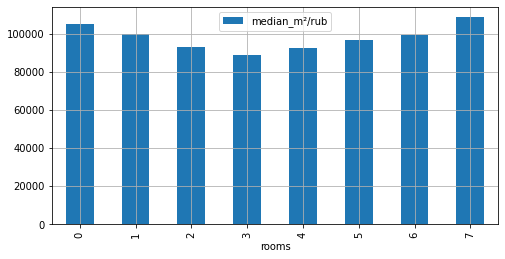

In [46]:
price_vs_m.columns = ('mean_m²/rub', 'median_m²/rub')
price_vs_m.plot(y='median_m²/rub', kind='bar', figsize=(8, 4), grid=True)

Любопытно выглядит взаимосвязь комнат и цены за м². Трехкомнатные квартиры по этому показателю выгоднее всего покупать.

**Влияние этажа на цену**

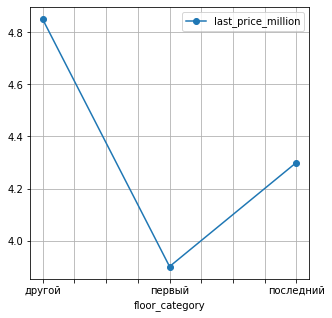

,median,mean,count
,last_price_million,last_price_million,last_price_million
floor_category,,,
другой,4.85,6.647197,17262
первый,3.90,4.809840,2896
последний,4.30,6.882558,3316


In [47]:
ap.pivot_table(index='floor_category', values='last_price_million', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
ap_floor = ap.pivot_table(index='floor_category', values='last_price_million', aggfunc=['median', 'mean', 'count'])
ap_floor

Квартиры на первых этажах значительно дешевле чем на других, но и на последних жить хотят не все. Возможно поэтому сейчас некоторые застройщики стали отдавать первые этажи под коммерческие помещения, а ана последних делать еще один технический этаж.

,median,mean,count
,last_price_million,last_price_million,last_price_million
weekday,,,
0,4.650,6.449418,3579
1,4.725,6.381308,4146
2,4.700,6.451389,3931
3,4.650,6.720487,4259
4,4.550,6.364530,3972
5,4.550,6.389849,1914
6,4.550,6.254252,1673


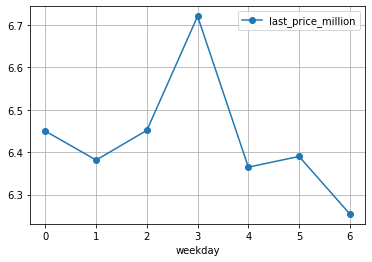

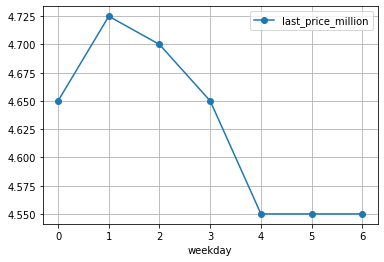

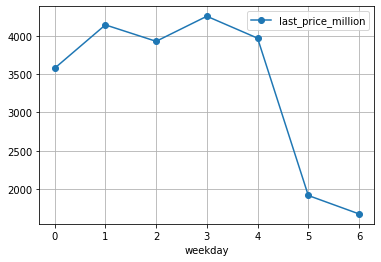

In [48]:
ap.pivot_table(index='weekday', values='last_price_million').plot(grid=True, style='o-') # Зависимость цены от дня публикации
ap.pivot_table(index='weekday', values='last_price_million', aggfunc='median').plot(grid=True, style='o-') # Зависимость медианы цены от дня публикации
ap.pivot_table(index='weekday', values='last_price_million', aggfunc='count').plot(grid=True, style='o-') # Зависимость числа публикаций от дня публикации
ap_week = ap.pivot_table(index='weekday', values='last_price_million', aggfunc=['median', 'mean', 'count']) 
ap_week

Графики будто говорят, что связь с днем публикации и ценой есть. Но разброс в 200 тыс. в ценах квартир на деле небольшой. Единственное, что можно здесь отметить, в выходные происходит значительно меньше публикаций, возможно с этим связана корреляция с ценой.

,median,mean,count
,last_price_million,last_price_million,last_price_million
month,,,
1,4.600,6.675605,1480
2,4.650,6.321871,2623
3,4.650,6.368161,2566
4,4.800,6.613209,2350
5,4.500,6.602037,1257
6,4.400,6.327412,1740
7,4.650,6.643967,1679
8,4.580,6.356985,1732


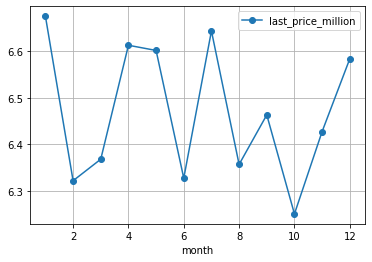

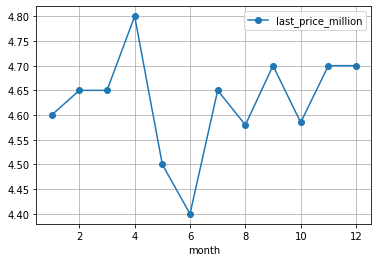

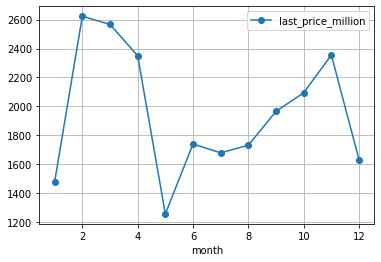

In [49]:
ap.pivot_table(index='month', values='last_price_million').plot(grid=True, style='o-') # Зависимость цены от месяца публикации
ap.pivot_table(index='month', values='last_price_million', aggfunc='median').plot(grid=True, style='o-') # Зависимость медианы цены от месяца публикации
ap.pivot_table(index='month', values='last_price_million', aggfunc='count').plot(grid=True, style='o-') # Зависимость числа публикаций от месяца публикации
ap_month = ap.pivot_table(index='month', values='last_price_million', aggfunc=['median', 'mean', 'count']) 
ap_month

Однозначно видно по графикам, что май-июнь - мертвый сезон для продажи квартиры. В это время публикуют меньше всего объявлений и цену ставят ниже.

,median,mean,count
,last_price_million,last_price_million,last_price_million
year,,,
2014,7.6400,12.046600,136
2015,5.3125,8.569508,1160
2016,4.5500,6.694054,2737
2017,4.5000,6.409990,8135
2018,4.5830,5.925105,8444
2019,5.0500,6.784884,2862


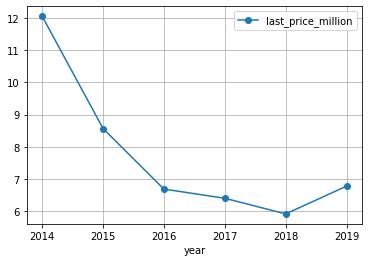

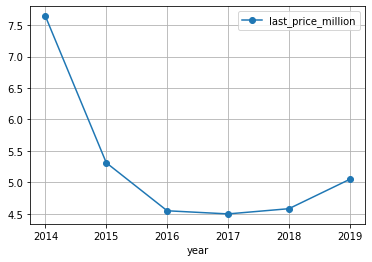

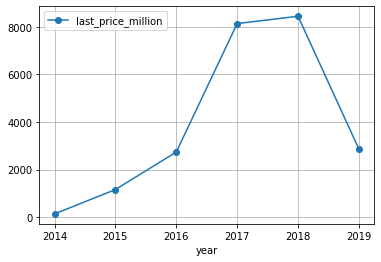

In [50]:
ap.pivot_table(index='year', values='last_price_million').plot(grid=True, style='o-') # Зависимость цены от года публикации
ap.pivot_table(index='year', values='last_price_million', aggfunc='median').plot(grid=True, style='o-') # Зависимость медианы цены от года публикации
ap.pivot_table(index='year', values='last_price_million', aggfunc='count').plot(grid=True, style='o-') # Зависимость числа публикаций от года публикации
ap_year = ap.pivot_table(index='year', values='last_price_million', aggfunc=['median', 'mean', 'count']) 
ap_year

По графикам мы видим как с 2014 резко упали цены на квартиры, и начали расти только в 2019. А число предложений наоборот  росло с 2014 по 2018, а в 2019 резко упало.

**На данном этапе мы определили факторы, которые наибольшим образом влияют на цену. Это площадь, количество комнат, этажность и месяц и год публикации**

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

In [51]:
ap_loc = ap.pivot_table(index='locality_name', values='m²/rub', aggfunc=['mean', 'count'])
ap_loc.columns = ['mean', 'count']
ap_loc = ap_loc.sort_values('count', ascending=False).head(10)
ap_loc

,mean,count
locality_name,,
Санкт-Петербург,114459.678938,15592
поселок Мурино,85472.231752,548
поселок Шушары,78576.554795,438
Всеволожск,68718.853904,397
Пушкин,103123.614130,368
Колпино,75424.150888,338
поселок Парголово,90175.489297,327
Гатчина,68745.693811,307
деревня Кудрово,92463.439597,298


**В данной таблице выделены 10 населенных пунктов с наибольшим числом объявлений. Среди них очевидно по средней цене за м², очевидно, лидирует Санкт-Петербург, за ним идет город Пушкин. Самая низкая цена за м² в городе Выборг, там и меньше всего объявлений в нашей десятке.**

#### Cредняя стоимость на разном удалении от центра города

<AxesSubplot:xlabel='km'>

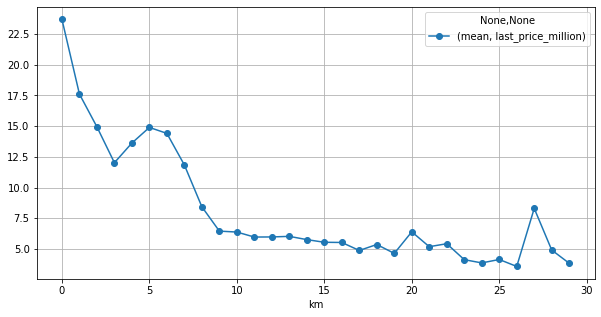

In [52]:
ap_spb = ap.loc[ap['locality_name'] == 'Санкт-Петербург'] # Выделяем Санкт-Петербург в отдельную таблицу
ap_spb = ap_spb.dropna(subset = ['cityCenters_nearest']) # Удаляем пропуски 
def distance (m):
        if 0 <= m <= 999:
            return 0
        elif 1000 <= m <= 1999:
            return 1
        elif 2000 <= m <= 2999: 
            return 2
        elif 3000 <= m <= 3999:
            return 3
        elif 4000 <= m <= 4999:
            return 4
        elif 5000 <= m <= 5999:
            return 5
        elif 6000 <= m <= 6999:
            return 6
        elif 7000 <= m <= 7999: 
            return 7
        elif 8000 <= m <= 8999:
            return 8
        elif 9000 <= m <= 9999:
            return 9
        elif 10000 <= m <= 10999:
            return 10
        elif 11000 <= m <= 11999:
            return 11
        elif 12000 <= m <= 12999: 
            return 12
        elif 13000 <= m <= 13999:
            return 13
        elif 14000 <= m <= 14999:
            return 14
        elif 15000 <= m <= 15999:
            return 15
        elif 16000 <= m <= 16999:
            return 16
        elif 17000 <= m <= 17999: 
            return 17
        elif 18000 <= m <= 18999:
            return 18
        elif 19000 <= m <= 19999:
            return 19
        elif 20000 <= m <= 20999:
            return 20
        elif 21000 <= m <= 21999:
            return 21
        elif 22000 <= m <= 22999: 
            return 22
        elif 23000 <= m <= 23999:
            return 23
        elif 24000 <= m <= 24999:
            return 24
        elif 25000 <= m <= 25999:
            return 25
        elif 26000 <= m <= 26999:
            return 26
        elif 27000 <= m <= 27999: 
            return 27
        elif 28000 <= m <= 28999:
            return 28
        elif 29000 <= m <= 29999:
            return 29

ap_spb['km'] = ap_spb['cityCenters_nearest'].apply(distance)      
ap_spb = ap_spb.pivot_table(index='km', values='last_price_million', aggfunc=['mean'])
ap_spb.plot(grid=True, style='o-', figsize=(10,5))

**По графику хорошо видно, что средняя цена на квратиры резко падает с каждым километром от центра вплоть до 3 км. После чего немного растет, что может быть связано с нахождением элитного района на растоянии примерно 5 км от центра, и вновь падает до 9 км. С 9 км падение средних цен замедляется. Мы наблюдаем еще один небольшой пик на 27 км, возможно это влияние цен жилья в Петергофе.**

### Общий вывод

В ходе исследования был проведен анализ влияния различных факторов на цены квартир Санкт-Петербурга и его пригорода.

1. Данные для исследования содержали большое количество пропусков, особенно там где они должны заполнятся автоматически с помощью геосервисов. Следует обратить на это внимание и выяснить причину, а также по возможности исправить для дальнейшего сбора данных. 
2. В ходе предобработки были заполнены некоторые пропуски в данных, удалены аномальные значения.
3. Следующим шагом были добавлены новые столбцы, для исследования: цена за м², день, месяц и год публикации, расстояние до центра города в км, цена в млн, тип этажа (первый, последний, другой)

4.Исследовательский анализ данных:

4.1. Изучены основные параметры. Сделаны следующие выводы: 
- больше всего продается квартир площадью 25-50 м²
- подавляющие большинство объявлений имеет цену ниже 5 млн
- чаще продаются 1 и 2-х комнатные квартиры, чуть меньше 3-х комнатные
- высота потолков квартир редко превышает 3 метра
- больше всего объявлений в 5-ти и 9-ти этажных домах
- большинство квартир находится в полукилометре от ближайшего парка

4.2. По сроку публикации объявления мы сделали вывод, что среднее время продажи квартир находится в диапозоне от 3 до 6 месяцев.

4.3. Факторами наиболее влияющими на цену являются:
- количество комнат: выгоднее всего покупать 3-х комнатные квартиры, в них ниже всего цена за м²
- этажность: на первых и последних этажах квартиры стоят дешевле
- время публикации: в мае-июне снижается количество публикаций и средняя цена объявлений
- год публикации: с 2014 года цены падали, с 2019 стали немного расти, а количество предложений наоборот росло с 2014 до 2018 года
4.4. Среди 10-ти населенных пунктов с наибольшем количеством публикаций самые дорогие квартиры в Санкт-Петербурге и городе Пушкин, а самые дешевы - в Выборге.

4.5. Выявлена высокая зависимость цены от растояния до центра города.